In [2]:
import numpy as np
import IPython.display as ipd
from matplotlib import pyplot as plt
import librosa.display
import soundfile as sf
import csv
from scipy import signal 
from sklearn.metrics import mean_squared_error

np.random.seed(246810)

In [3]:
sr = 22050
ten = np.zeros(sr * 10)
# returns y with an impulse at every m millisecond
def metro(y, m):
    sr = 22050 // 1000 # samples per milisecond
    # iterate signal in ms, ith milisecond
    for i in range(30, len(ten) // sr - 30):
        if i % m == 0:
            y[(i - 30) * sr : (i + 30) * sr] = 1
    return y

In [4]:
y_hat = metro(ten, 500)

In [5]:
ipd.Audio(y_hat, rate=sr) 

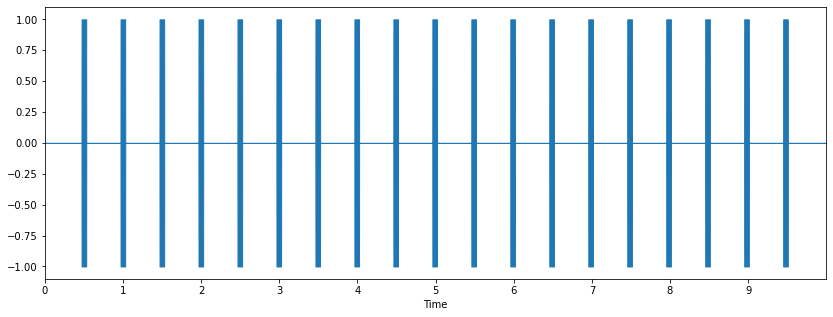

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y_hat, sr=sr)

In [7]:
y_fm = y_hat * simpleFM(10, 10 * 22050, 220, 200)

NameError: name 'simpleFM' is not defined

In [ ]:
ipd.Audio(y_fm, rate=sr) 

In [ ]:
def write_to_wav(signal, direction):
    data_dir = "./data"
    label_dir = "./labels"
    

In [ ]:
line1 = line([60, 80, 1000], 60 * (22050 // 1000))

In [ ]:
test_list = list(line1)

In [ ]:
plt.plot(range(len(test_list)), test_list)

In [ ]:
range(0, 10.2)

In [8]:
def simpleFM(T, samples, fc, fm, sr=22050):
    twopi = 2*np.pi

    t = np.linspace(0, T, samples, endpoint=False) # time variable

    # Produce ramp from 0 to 1
    beta = np.linspace(0, 1, samples)


    output = np.sin(twopi*fc*t + beta*np.sin(twopi*fm*t))
    return output
# returns a generator that yields samples from a ramp function
# x: ramp function of form (start1,end1,interval1,end2,interval2,...endn,intervaln)
# rate: yield the rate-th ms each time
# end: how long of a signal we want, in samples
def line(x, num_splits, sr=22050):
    
    T = 0
    for i in range(2, len(x), 2):
        T += x[i]
    
    increment = T // num_splits
    tempos = np.linspace()
    for i in range(0, len(x) - 2, 3):
        start, end, length = x[i], x[i + 1], x[i + 2] // 1000
        
    
# y_len: length of signal in ms
# m: yields a beat at every m ms
def metro_gen(y_len, m, sr=22050):
    sr = sr // 1000 # samples per milisecond
    # iterate signal in ms, ith milisecond
    i = 0
    while i < y_len * sr - 60 * sr:
        if i % int(m * sr) == 0:
            for j in range(60 * sr):
                yield(1)
            i += 60 * sr
        else:
            yield(0)
            i += 1

# sig_len: length of each signal with tempo t_i, in ms
def construct_signal(ramp, sig_len=1000, sr=22050):
    for i in range(0, len(ramp) - 1, 2):
        tempo, length = ramp[i], ramp[i + 1]
        beat = 60 / tempo * 1000 
        yield from metro_gen(length, beat)

# length of signal = y_len(60ms) * num_tempos(1103) = 66 seconds

In [9]:
s = construct_signal([60, 2000, 80, 2000, 200, 4000])

In [10]:
arr = np.array(list(s), dtype=np.float32)

In [11]:
arr_hat = arr * simpleFM(len(arr) / 22050, len(arr), 220, 1)

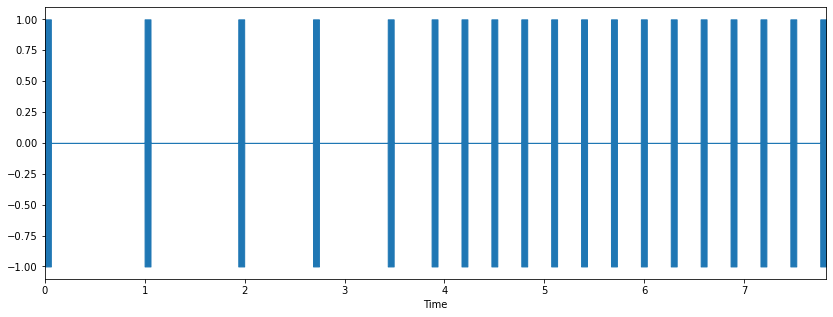

In [12]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(arr, sr=sr)

In [13]:
ipd.Audio(arr_hat, rate=sr) 

In [14]:
# N: number of sample points
def generate_dataset(N,T=30, tempo_range=(60, 200), t_range=(2, 10), sr=22050):
    for point in range(N):
        t = 0
        generator_input = []
        while t < 30:
            tempo = np.random.randint(tempo_range[0], tempo_range[1])
            interval = np.random.randint(t_range[0], t_range[1])
            generator_input += [tempo, interval * 1000]
            
            t += interval
        gen = construct_signal(generator_input)
        signal = np.array(list(gen), dtype=np.float32)
        signal = signal * simpleFM(len(signal) / sr, len(signal), 220, 1)
        filename = "../dataset/audio/" + str(point) + ".wav"
        sf.write(filename, signal, sr)
        with open('../dataset/labels/' + str(point) + '.csv', mode='w') as file:
            writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            writer.writerow(["tempo", "duration"])
            for i in range(0, len(generator_input) - 1, 2):
                writer.writerow([generator_input[i], generator_input[i+1]])

        
        

In [15]:
generate_dataset(200)

# Evaluate Tempos

In [16]:
def training_tempo(filename, sr=22050):
    signal = []
    with open(filename, mode='r') as file:
        datareader = csv.reader(file)
        next(datareader)
        for row in datareader:
            tempo, interval = int(row[0]), int(row[1])
            period = [tempo] * (interval // 1000)
            signal += period
    signal = np.array(signal)
    return signal

def test_tempo(y, win_len, sr=22050):
    signal = []
    for tempo in y:
        window = (win_len) * [tempo]
        signal += window
    return signal

def get_error(X, y):
    return mean_squared_error(X[:len(y)], y, squared=False)

In [355]:
X = training_tempo("../dataset/labels/1.csv")

In [356]:
_tempos = [161, 161, 90, 90, 100, 100, 80, 80, 120]
test_signal = test_tempo(_tempos, 3)

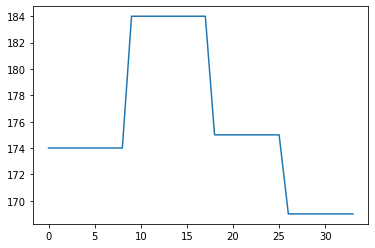

In [357]:
plt.plot(range(len(X)), signal.resample(X, len(X)))

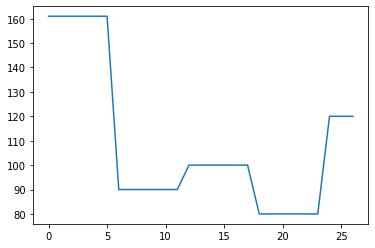

In [359]:
plt.plot(range(len(test_signal)), test_signal)

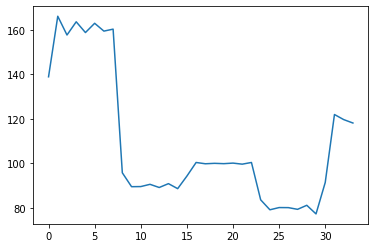

In [352]:
plt.plot(range(len(test_signal) // sr), signal.resample(test_signal, len(test_signal) // sr))

In [353]:
signal.resample(test_signal, len(test_signal) // sr)

array([140.40480288, 165.28521147, 157.87959363, 164.15765504,
       157.00952053, 167.73130675, 125.23694549,  83.81218312,
        93.37635137,  87.61351903,  91.98734948,  87.94578493,
        95.91887914, 100.16867973, 100.05983142,  99.99611364,
        99.75174156, 101.01451714,  90.83880585,  77.27885054,
        82.0483592 ,  78.00793937,  82.35233062,  76.26297814,
        99.82533957, 124.35413294, 115.68127742])

In [360]:
Y_hat = signal.resample(test_signal, len(X) // sr)
X_hat = signal.resample(X, len(X) // sr)

rms = mean_squared_error(X[:len(test_signal)], test_signal, squared=False)

In [361]:
rms

75.43135216134527